In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import curve_fit


In [3]:
ODMR_data = pd.read_csv('ODMR_with_field_V1.csv')
current_data = ODMR_data["Current"]
frequency_data = ODMR_data["Frequency"]
Signal_data = ODMR_data["Signal"]


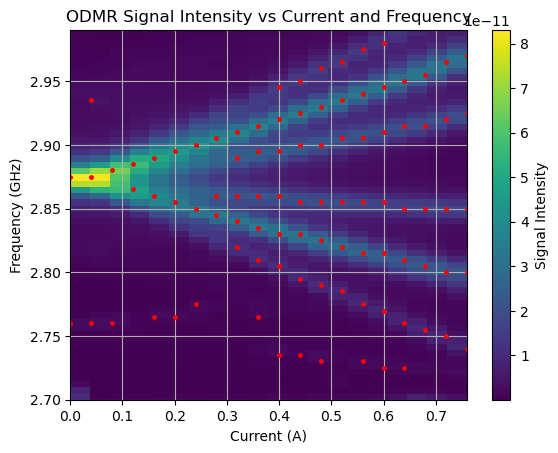

In [4]:
# Extract unique axis values
currents = np.sort(ODMR_data["Current"].unique())
frequencies = np.sort(ODMR_data["Frequency"].unique())

# Pivot to 2D array: rows = Frequency, columns = Current
Signal_grid = ODMR_data.pivot(index="Frequency", columns="Current", values="Signal").values

# --- Peak detection along each column (i.e., frequency sweep per current) ---
for col_idx, current in enumerate(currents):
    signal_slice = Signal_grid[:, col_idx]
    peaks, _ = find_peaks(signal_slice, prominence=1e-12)  # adjust as needed
    # Plot peaks as red dots
    peak_freqs = frequencies[peaks]
    plt.plot([current] * len(peak_freqs), peak_freqs, 'r.', markersize=5)

# Plot the heatmap
plt.imshow(Signal_grid, aspect='auto', origin='lower',
           extent=[currents.min(), currents.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='Signal Intensity')
plt.xlabel('Current (A)')
plt.ylabel('Frequency (GHz)')
plt.title('ODMR Signal Intensity vs Current and Frequency')
plt.grid(True)
plt.show()

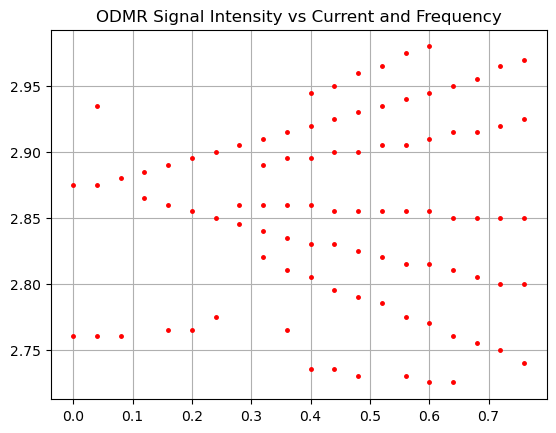

In [5]:
# Extract unique axis values
currents = np.sort(ODMR_data["Current"].unique())
frequencies = np.sort(ODMR_data["Frequency"].unique())

# Pivot to 2D array: rows = Frequency, columns = Current
Signal_grid = ODMR_data.pivot(index="Frequency", columns="Current", values="Signal").values

# --- Peak detection along each column (i.e., frequency sweep per current) ---
for col_idx, current in enumerate(currents):
    signal_slice = Signal_grid[:, col_idx]
    peaks, _ = find_peaks(signal_slice, prominence=1e-12)  # adjust as needed
    # Plot peaks as red dots
    peak_freqs = frequencies[peaks]
    plt.plot([current] * len(peak_freqs), peak_freqs, 'r.', markersize=5)

# # Plot the heatmap
# plt.imshow(Signal_grid, aspect='auto', origin='lower',
#            extent=[currents.min(), currents.max(), frequencies.min(), frequencies.max()])
# plt.colorbar(label='Signal Intensity')
# plt.xlabel('Current (A)')
# plt.ylabel('Frequency (GHz)')
plt.title('ODMR Signal Intensity vs Current and Frequency')
plt.grid(True)
plt.show()

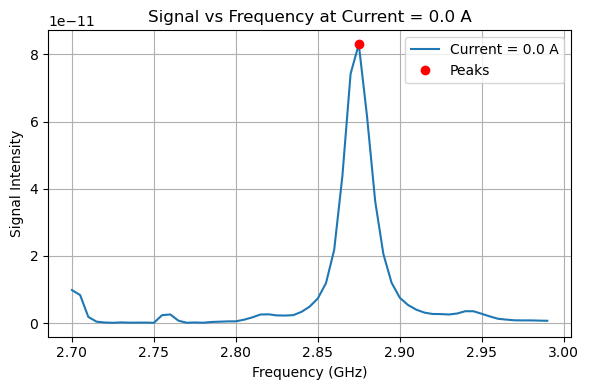

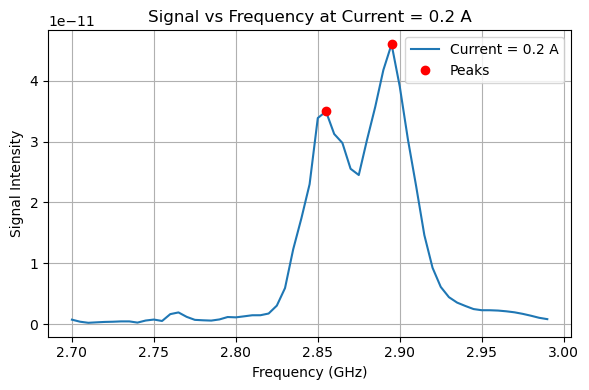

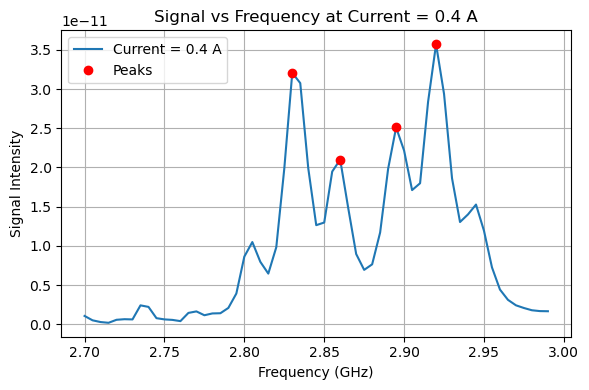

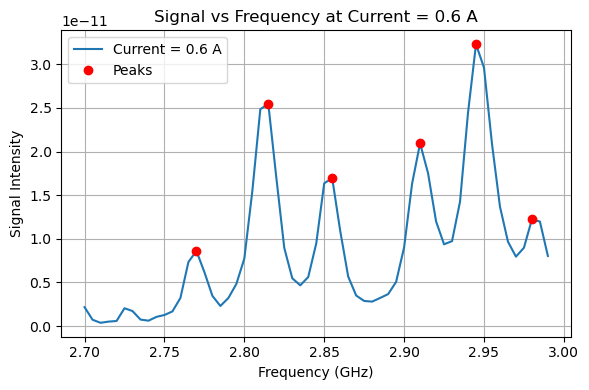

In [6]:
# Choose which current values to plot
selected_currents = [0.0, 0.2, 0.4, 0.6]  # adjust as needed based on what's in the data

# Plot signal vs frequency for each selected current
for current in selected_currents:
    # if current not in signal_grid.columns:
    #     print(f"Current {current} A not in dataset, skipping.")
    #     continue

    # Find the column index corresponding to the current value
    col_idx = np.where(currents == current)[0][0]
    signal_slice = Signal_grid[:, col_idx]
    peaks, _ = find_peaks(signal_slice, prominence=0.5 * np.std(signal_slice))

    plt.figure(figsize=(6, 4))
    plt.plot(frequencies, signal_slice, label=f'Current = {current} A')
    plt.plot(frequencies[peaks], signal_slice[peaks], 'ro', label='Peaks')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Signal Intensity')
    plt.title(f'Signal vs Frequency at Current = {current} A')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [7]:
ODMR_data = pd.read_csv("ODMR_with_field_0512.csv")
current_data = ODMR_data["Current"]
frequency_data = ODMR_data["Frequency"]
Signal_data = ODMR_data["Signal"]


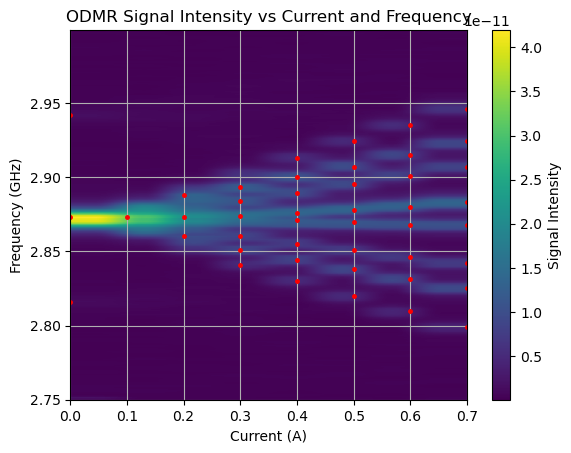

In [8]:
# Extract unique axis values
currents = np.sort(ODMR_data["Current"].unique())
frequencies = np.sort(ODMR_data["Frequency"].unique())

# Pivot to 2D array: rows = Frequency, columns = Current
Signal_grid = ODMR_data.pivot(index="Frequency", columns="Current", values="Signal").values

# --- Peak detection along each column (i.e., frequency sweep per current) ---
for col_idx, current in enumerate(currents):
    signal_slice = Signal_grid[:, col_idx]
    peaks, _ = find_peaks(signal_slice, prominence=1e-12)  # adjust as needed
    # Plot peaks as red dots
    peak_freqs = frequencies[peaks]
    plt.plot([current] * len(peak_freqs), peak_freqs, 'r.', markersize=5)

# Plot the heatmap
plt.imshow(Signal_grid, aspect='auto', origin='lower',
           extent=[currents.min(), currents.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='Signal Intensity')
plt.xlabel('Current (A)')
plt.ylabel('Frequency (GHz)')
plt.title('ODMR Signal Intensity vs Current and Frequency')
plt.grid(True)
plt.show()

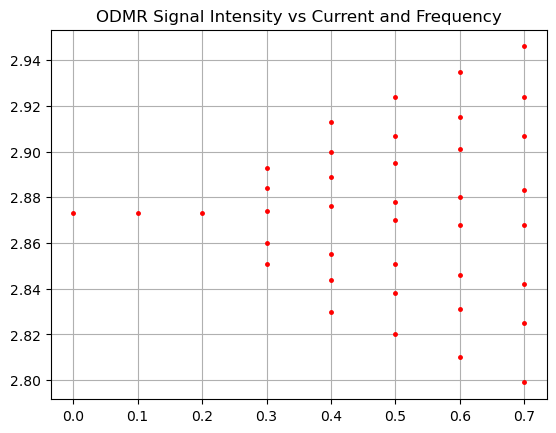

In [17]:
# Extract unique axis values
currents = np.sort(ODMR_data["Current"].unique())
frequencies = np.sort(ODMR_data["Frequency"].unique())

# Pivot to 2D array: rows = Frequency, columns = Current
Signal_grid = ODMR_data.pivot(index="Frequency", columns="Current", values="Signal").values
data_fit = [] 
# --- Peak detection along each column (i.e., frequency sweep per current) ---
for col_idx, current in enumerate(currents):
    signal_slice = Signal_grid[:, col_idx]
    peaks, _ = find_peaks(signal_slice, prominence=2e-12)  # adjust as needed
    # Plot peaks as red dots
    peak_freqs = frequencies[peaks]
    data_fit.append(peak_freqs)
    plt.plot([current] * len(peak_freqs), peak_freqs, 'r.', markersize=5)

# # Plot the heatmap
# plt.imshow(Signal_grid, aspect='auto', origin='lower',
#            extent=[currents.min(), currents.max(), frequencies.min(), frequencies.max()])
# plt.colorbar(label='Signal Intensity')
# plt.xlabel('Current (A)')
# plt.ylabel('Frequency (GHz)')
plt.title('ODMR Signal Intensity vs Current and Frequency')
plt.grid(True)
plt.show()


In [20]:
# print(data_fit)
# Pad each array to length 8 using the last value (repeat last element)
padded_arrays = [
    np.pad(a, (0, 8 - len(a)), mode='edge') if len(a) < 8 else a
    for a in data_fit
]

# Stack into a matrix
print(padded_arrays)


[array([2.873, 2.873, 2.873, 2.873, 2.873, 2.873, 2.873, 2.873]), array([2.873, 2.873, 2.873, 2.873, 2.873, 2.873, 2.873, 2.873]), array([2.873, 2.873, 2.873, 2.873, 2.873, 2.873, 2.873, 2.873]), array([2.851, 2.86 , 2.874, 2.884, 2.893, 2.893, 2.893, 2.893]), array([2.83 , 2.844, 2.855, 2.876, 2.889, 2.9  , 2.913, 2.913]), array([2.82 , 2.838, 2.851, 2.87 , 2.878, 2.895, 2.907, 2.924]), array([2.81 , 2.831, 2.846, 2.868, 2.88 , 2.901, 2.915, 2.935]), array([2.799, 2.825, 2.842, 2.868, 2.883, 2.907, 2.924, 2.946])]


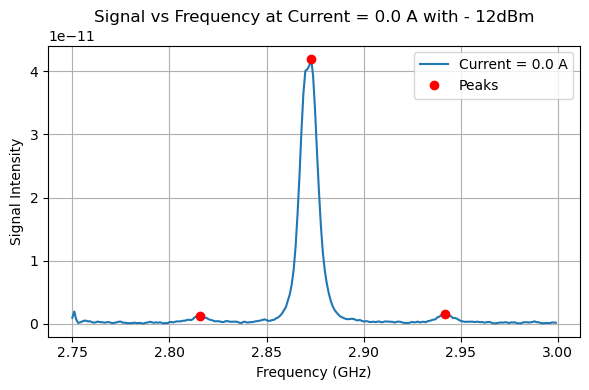

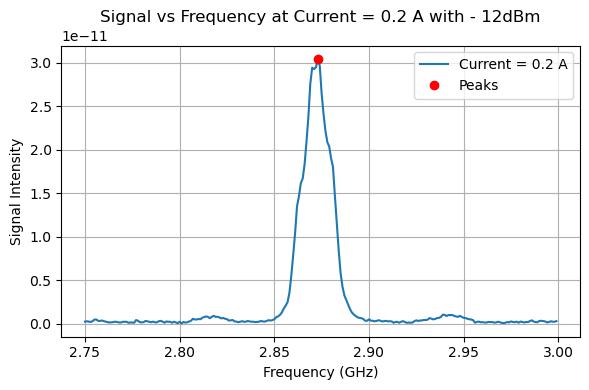

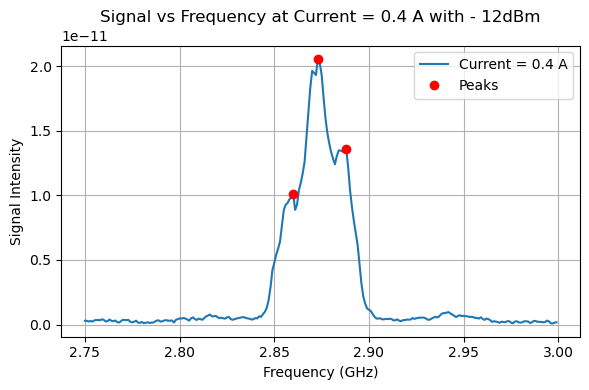

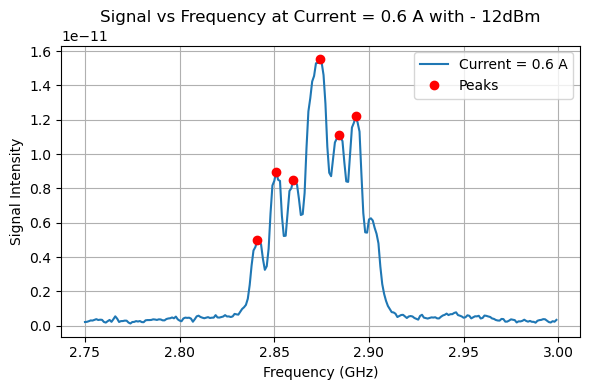

In [16]:
# Choose which current values to plot
selected_currents = [0.0, 0.2, 0.4, 0.6]  # adjust as needed based on what's in the data

# Plot signal vs frequency for each selected current
for current in selected_currents:
    # if current not in signal_grid.columns:
    #     print(f"Current {current} A not in dataset, skipping.")
    #     continue

    # Find the column index corresponding to the current value
    col_idx = np.where(currents == current)[0][0]
    signal_slice = Signal_grid[:, col_idx]
    peaks, _ = find_peaks(signal_slice, prominence=1e-12,distance=2)

    plt.figure(figsize=(6, 4))
    plt.plot(frequencies, signal_slice, label=f'Current = {current} A')
    plt.plot(frequencies[peaks], signal_slice[peaks], 'ro', label='Peaks')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Signal Intensity')
    # plt.xlim(2.825, 2.925)
    plt.title(f'Signal vs Frequency at Current = {current} A with - 12dBm')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

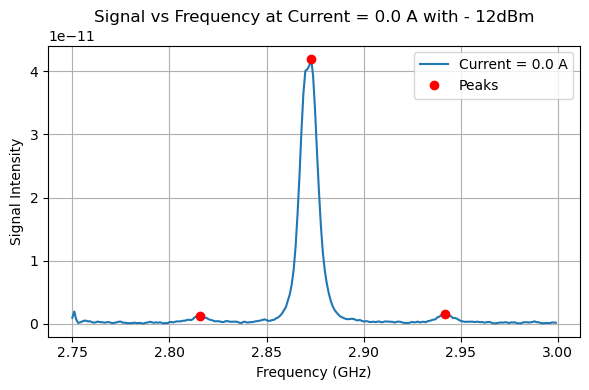

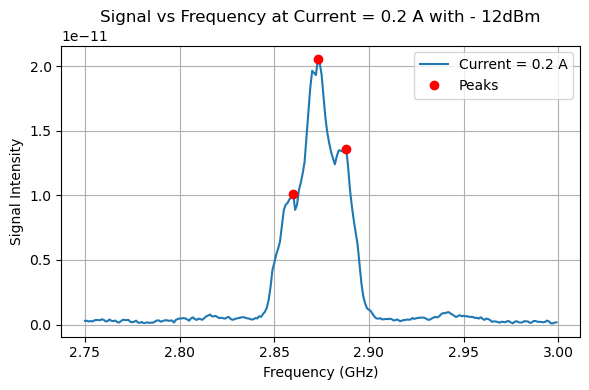

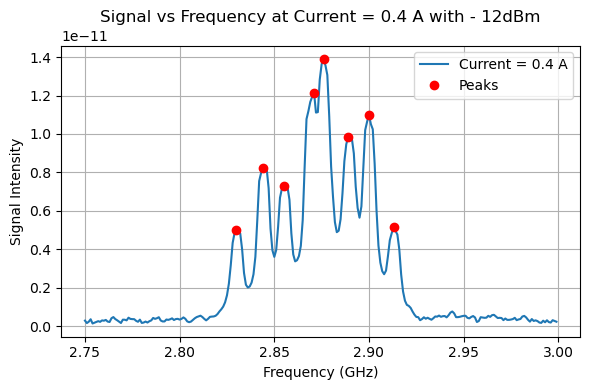

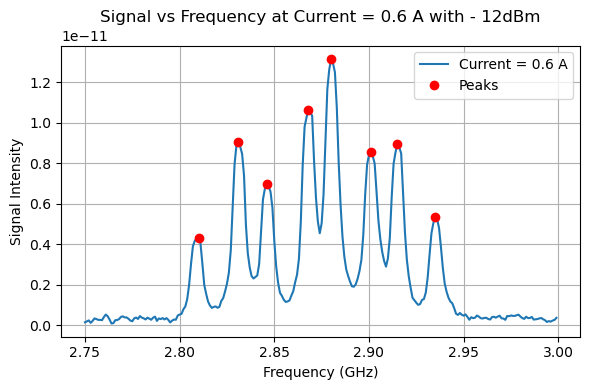

In [11]:
# Choose which current values to plot
selected_currents = [0.0, 0.2, 0.4, 0.6]  # adjust as needed based on what's in the data

# Plot signal vs frequency for each selected current
for current in selected_currents:
    # if current not in signal_grid.columns:
    #     print(f"Current {current} A not in dataset, skipping.")
    #     continue

    # Find the column index corresponding to the current value
    col_idx = np.where(currents == current)[0][0]
    signal_slice = Signal_grid[:, col_idx]
    peaks, _ = find_peaks(signal_slice, prominence=1e-12,distance=2)

    plt.figure(figsize=(6, 4))
    plt.plot(frequencies, signal_slice, label=f'Current = {current} A')
    plt.plot(frequencies[peaks], signal_slice[peaks], 'ro', label='Peaks')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Signal Intensity')
    # plt.xlim(2.825, 2.925)
    plt.title(f'Signal vs Frequency at Current = {current} A with - 12dBm')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [12]:
g_e = 28e9
D = 2.87e9

S = {'x': [], 'y': [], 'z': []}
S['x'] = np.array([[             0,    1/np.sqrt(2),              0],
                   [  1/np.sqrt(2),               0,   1/np.sqrt(2)],
                   [              0,   1/np.sqrt(2),              0]])

S['y'] = np.array([[              0, -1j/np.sqrt(2),              0],
                   [  1j/np.sqrt(2),              0, -1j/np.sqrt(2)],
                   [              0,  1j/np.sqrt(2),              0]])

S['z'] = np.array([[              1,              0,              0],
                   [              0,              0,              0],
                   [              0,              0,             -1]])

e = {'x': np.array([1, 0, 0]),
     'y': np.array([0, 1, 0]),
     'z': np.array([0, 0, 1])}

NV_axis = np.array([[ 1,  1,  1],
                    [-1, -1,  1],
                    [-1,  1, -1],
                    [ 1, -1, -1]])
NV_axis = [axis / np.linalg.norm(axis) for axis in NV_axis]
NV_comp = {key: [np.dot(axis, e[key]) for axis in NV_axis] for key in e}

In [13]:
coil_constant = 0.01   # in T/A originally 0.012 -> I got 0.01 for my orientation
u = [1.0,.2,0.25]

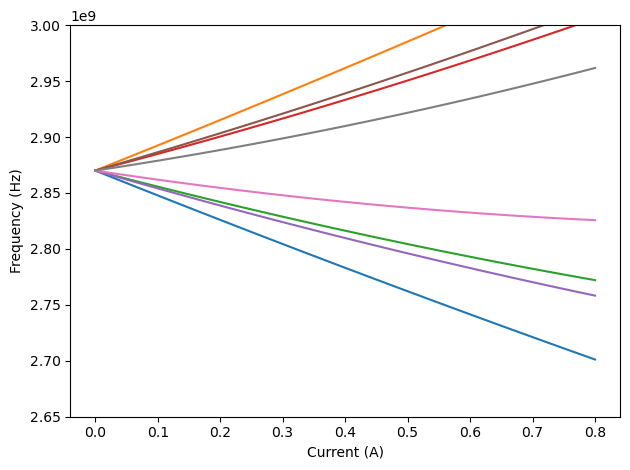

In [14]:
u = np.array(u)
u = u / np.linalg.norm(u)

current = np.linspace(0, 0.8, num=50)
frequency = np.linspace(2.65e9, 3e9, 12)
B0 = coil_constant * current
B = {key: np.dot(u, e[key]) for key in e}

diff_eigs = []
for b0 in B0:
    H=np.ndarray((4, 3, 3), dtype=complex)
    for i in range(0, 4):
        H[i] = D * np.linalg.matrix_power(sum([NV_comp[key][i] * S[key] for key in e]), 2) + \
               g_e * b0 * sum([B[key] * S[key] for key in e])
    eigs = [np.linalg.eig(H[i])[0] for i in range(0, 4)]
    eigs = [np.sort(ev) for ev in eigs]
    diff_eigs.append([[np.real(ev[1]-ev[0]), np.real(ev[2]-ev[0])] for ev in eigs])
diff_eigs = np.array(diff_eigs)

fig, ax = plt.subplots()
data = {}
 

for i in range(0,4):
    for j in range(0,2):
        ax.plot(current, diff_eigs[:, i, j]);
ax.set_ylim([2.65e9, 3e9]);
ax.set_xlabel('Current (A)');
ax.set_ylabel('Frequency (Hz)');
plt.tight_layout()
plt.show()

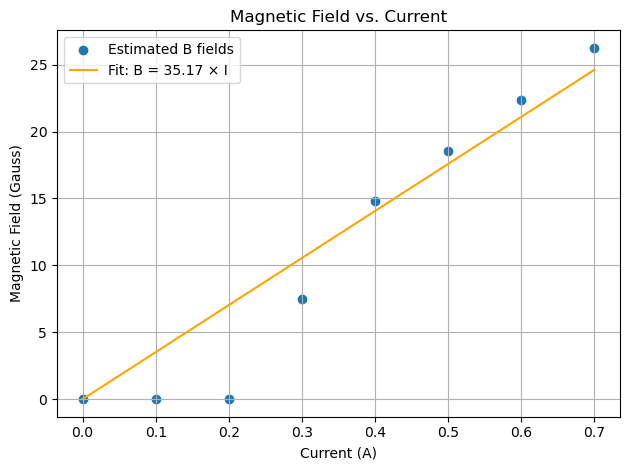

35.16581632406523

In [22]:


# Guessing data from the plot
# Format: (Current in A, ODMR frequencies in GHz)
fit_data_array = {
    0.0: padded_arrays[0],
    0.1: padded_arrays[1],
    0.2: padded_arrays[2],
    0.3: padded_arrays[3],
    0.4: padded_arrays[4],
    0.5: padded_arrays[5],
    0.6: padded_arrays[6],
    0.7: padded_arrays[7],
}

# Extract central frequencies and max splittings
currents = []
splittings = []

for current, freqs in fit_data_array.items():
    freqs = np.array(freqs)
    center = 2.87  # approx zero-field resonance
    # Find the pair with largest symmetric split from center
    diffs = np.abs(freqs - center)
    max_idx = np.argmax(diffs)
    outer_freq = freqs[max_idx]
    # Find the symmetric pair
    opposite_freq = 2 * center - outer_freq
    # Closest match to opposite_freq in the data
    sym_idx = (np.abs(freqs - opposite_freq)).argmin()
    delta_f = np.abs(freqs[max_idx] - freqs[sym_idx])
    currents.append(current)
    splittings.append(delta_f)

currents = np.array(currents)
splittings = np.array(splittings)

# Convert splitting (GHz) to B field (Gauss)
gamma_e = 2.8e-3  # GHz/Gauss
B_fields = splittings / (2 * gamma_e)

# Fit B = k * I
def linear(x, k):
    return k * x

popt, _ = curve_fit(linear, currents, B_fields)
coil_constant = popt[0]  # in Gauss/A

# Plotting
plt.figure()
plt.scatter(currents, B_fields, label="Estimated B fields")
plt.plot(currents, linear(currents, *popt), label=f"Fit: B = {coil_constant:.2f} × I", color="orange")
plt.xlabel("Current (A)")
plt.ylabel("Magnetic Field (Gauss)")
plt.title("Magnetic Field vs. Current")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

coil_constant
